<h1 align="center"> MSIN0143 Coursework Group M2

<h3 align="center"> Can the success of a startup be predicted? Do certain characteristics give a startup a better chance of success?

<h3 align="center">Word Count: 1998 (excluding appendix and references)

## 1. Introduction


Over 80% of Venture Capital firms (VCs) are organised as limited partnerships, where investors are involved with the firm for approximately 10 years and actively invest in it for the first 5 (Gompers and Lerner, 2003). Therefore, there is an incentive for VCs to select start ups with high probability of success to provide returns to investors quickly, which would secure current and new partnerships (Gompers, 1996).

Our project focuses on understanding what factors make a startup successful. We define success in two ways as then the VC makes a profit: the company __reaching an IPO__ (20% of VC fund companies) or __getting acquired__ (20% of VC fund companies). 


Therefore, we wonder: do factors like __funding__ raised, the __industry__ and __country__ of the startup lead to a bigger chance of success? Is it the case that there is an average of 21.5% chance of failure within the 1st year of funding and by the 10th year, there is a 70% chance of failure? 

 
Can we provide a tool for VC funds to evaluate which startup would bring them high returns?

## 2. Data Preparation

To answer our questions we will use a dataset by the website Crunchbase, sourced throgh Kaggle from the Crunchbase API- https://www.kaggle.com/justinas/startup-investments?select=offices.csv


The data source contains 11 datasets which describe the startup ecosystem until 2013 but since we are only interested in the characteristics of a startup company, we will focus on only one dataset - the objects dataset.

__Data Cleaning__

Since the objects dataset contains data from other tables and some irrelevant attributes, we will need to do extensive data cleaning. We aim to clean the dataset through the following steps: 

1. Import packages and data needed
2. Filter the data based on its relevance
3. Find target column and encode values
4. Remove/address missing values


#### 1. Import packages and data needed

In [1]:
#installing xgboost
! pip install xgboost


         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.



In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# import libraries and modules needed for the project

import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import statsmodels.api as sm

from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score
from xgboost import XGBClassifier
from IPython import display

In [3]:
# Load the data into a pandas dataframe, include skipinitialspace for quicker loading and
# low_memory to avoid setting the data type of variables manualy (could be due to
# missing values)

df_c = pd.read_csv("objects.csv", skipinitialspace = True, low_memory= False)

In [4]:
#Understanding the data through different methods

#showing all attributes
pd.set_option('display.max_columns', None)

#displaying data 
df_c.head()

#understanding the dimentions
df_c.shape


,id,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,closed_at,domain,homepage_url,twitter_username,logo_url,logo_width,logo_height,short_description,description,overview,tag_list,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at
0,c:1,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,17/10/2005,NaN,wetpaint-inc.com,http://wetpaint-inc.com,BachelrWetpaint,http://s3.amazonaws.com/crunchbase_prod_assets...,401,54,NaN,Technology Platform Company,Wetpaint is a technology platform company that...,"wiki, seattle, elowitz, media-industry, media-...",USA,WA,Seattle,Seattle,NaN,NaN,0,0,01/10/2005,19/05/2008,3,39750000,05/09/2010,18/09/2013,5,17,initial-importer,25/05/2007 06:51,13/04/2013 03:29
1,c:10,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,NaN,flektor.com,http://www.flektor.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,186,85,NaN,NaN,Flektor is a rich-media mash-up platform that ...,"flektor, photo, video",USA,CA,Culver City,Los Angeles,NaN,NaN,0,0,NaN,NaN,0,0,NaN,NaN,0,6,initial-importer,31/05/2007 21:11,23/05/2008 23:23
2,c:10,Company,100,NaN,There,there,/company/there,games_video,acquired,NaN,NaN,there.com,http://www.there.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,107,34,NaN,NaN,There.com is an online virtual world where any...,"virtualworld, there, teens",USA,CA,San Mateo,SF Bay,NaN,NaN,0,0,NaN,NaN,0,0,01/02/2003,23/09/2011,4,12,initial-importer,06/08/2007 23:52,04/11/2013 02:09
3,c:10000,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,26/07/2008,NaN,mywebbo.com,http://www.mywebbo.com,NaN,NaN,0,0,NaN,NaN,"BRAND NEW ONLINE SOCIAL NETWORKING WEBSITE,FOR...","social-network, new, website, web, friends, ch...",NaN,NaN,NaN,unknown,NaN,NaN,0,0,NaN,NaN,0,0,NaN,NaN,0,0,NaN,24/08/2008 16:51,06/09/2008 14:19
4,c:10001,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,26/07/2008,NaN,themoviestreamer.com,http://themoviestreamer.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,200,74,NaN,NaN,This company shows free movies online on their...,"watch, full-length, moives, online, for, free,...",NaN,NaN,NaN,unknown,NaN,NaN,0,0,NaN,NaN,0,0,NaN,NaN,0,0,NaN,24/08/2008 17:10,06/09/2008 14:19


(462651, 40)

#### 2. Filter the data based on its relevance

In [5]:
#Displaying unique values in categorical variables 

df_categorical = df_c.filter(items = ["entity_type","category_code","status", "country_code", "state_code", "city", "region", "investment_rounds", "invested_companies", "funding_rounds", "milestones", "relationships"])

for col in df_categorical: 
    print(str(col) + "   " + str(df_categorical[col].unique()), end = "\n\n")

entity_type   ['Company' 'FinancialOrg' 'Person' 'Product']

category_code   ['web' 'games_video' 'network_hosting' 'advertising' 'cleantech' nan
 'enterprise' 'other' 'consulting' 'mobile' 'health' 'software'
 'analytics' 'finance' 'education' 'medical' 'manufacturing' 'biotech'
 'ecommerce' 'public_relations' 'hardware' 'search' 'news' 'government'
 'security' 'photo_video' 'travel' 'semiconductor' 'social' 'legal'
 'transportation' 'hospitality' 'sports' 'nonprofit' 'fashion' 'messaging'
 'music' 'automotive' 'design' 'real_estate' 'local' 'nanotech' 'pets']

status   ['operating' 'acquired' 'closed' 'ipo' 'live' 'beta' 'private' 'alpha'
 'development']

country_code   ['USA' nan 'MAR' 'IND' 'AUS' 'FRA' 'JPN' 'NLD' 'EGY' 'ISR' 'GBR' 'THA'
 'CAN' 'AUT' 'IRL' 'SWE' 'DEU' 'BRA' 'FIN' 'RUS' 'SGP' 'MEX' 'CHN' 'ESP'
 'ISL' 'KOR' 'TUR' 'DNK' 'ARG' 'PAK' 'HUN' 'POL' 'GRC' 'PRT' 'BLR' 'CSS'
 'MKD' 'CHE' 'SVN' 'UKR' 'ITA' 'NZL' 'LIE' 'NOR' 'CZE' 'VNM' 'HRV' 'BEN'
 'CHL' 'GHA' 'ZAF' 'MYS' 'EST

In [6]:
# As we are only interested in companies, we will remove all values except for Companies from the "entity_type" column
df_c = df_c[df_c['entity_type'] == 'Company']

#The data frame has been reduced to:
df_c.shape

(196553, 40)

We are focused on company specific factors in relation to the success of the business, for instance when a company closes or how much funds have been raised. 

Other columns such as 'twitter_username' or 'homepage_ucl' do not represent interest for our objective and do not provide predictive power as they are unique on each row, meaning we cannot generalize based on them.

Therefore, such attributes would be dropped from the dataframe:

In [7]:
# All attributes except for the following have been removed as they hold unique values in each row. Some attributes that hold unique 
# values remain as they have connection to the companies which is what we are interested in
# - state_code, region, city - dropped as we preserve country informtaion through the country_code variable
# - created_by, created_at, updated_at - stamps specific to Crunchbase with no connection to business success

df_c = df_c.drop(['id','entity_type','parent_id', 'normalized_name','permalink','domain', 'homepage_url', 'twitter_username', 
                 'logo_url', 'logo_width','logo_height','short_description', 'description', 'overview', 'tag_list',
                  'state_code', 'region', 'city','created_by', 'created_at', 'updated_at'], 1)

# There would be no significant drawbacks for the analysis and ML algorithm from dropping the columns


In [8]:
#Displaying the dataset with reduced dimentions
df_c.head()
df_c.shape

,entity_id,name,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships
0,1,Wetpaint,web,operating,17/10/2005,NaN,USA,NaN,NaN,0,0,01/10/2005,19/05/2008,3,39750000,05/09/2010,18/09/2013,5,17
1,10,Flektor,games_video,acquired,NaN,NaN,USA,NaN,NaN,0,0,NaN,NaN,0,0,NaN,NaN,0,6
2,100,There,games_video,acquired,NaN,NaN,USA,NaN,NaN,0,0,NaN,NaN,0,0,01/02/2003,23/09/2011,4,12
3,10000,MYWEBBO,network_hosting,operating,26/07/2008,NaN,NaN,NaN,NaN,0,0,NaN,NaN,0,0,NaN,NaN,0,0
4,10001,THE Movie Streamer,games_video,operating,26/07/2008,NaN,NaN,NaN,NaN,0,0,NaN,NaN,0,0,NaN,NaN,0,0


(196553, 19)

#### 3. Find target column and encode the values

In [9]:
# We are interested in the success of the companies so we identified the target column to be "status"
# Checking the unique values for the target column "status".
df_c["status"].unique()

#Checking how many percent of the data falls under each unique status value.
df_c["status"].value_counts()/len(df_c)

array(['operating', 'acquired', 'closed', 'ipo'], dtype=object)

operating    0.933290
acquired     0.047794
closed       0.013147
ipo          0.005769
Name: status, dtype: float64

In [10]:
# Since we are interested in the proven success of a company (either successful or failed), 
# companies in the "operating" category would not be relevant as they would still have the probaility to fail, 
#whereas, companies that are either "aquired" or "ipo" have proven to be successful.

# Therefore, we will remove the value "operating" from the df_c.
df_c = df_c[df_c['status'] != 'operating']

#Removing approximately 94% of the company data wold reduce it significantly, however, we cannot make conclusions from operating companies.

In [11]:
# The reduced data frame would therefore have the following dimentions
df_c.shape

(13112, 19)

In [12]:
# The new split of the data therefore is the following:
df_c["status"].value_counts()/len(df_c)

# That would give us data that is mainly successful startups (approximately 80%) and 20% failed startups
# That goes against logic - typically most of new startups fail. 
# We explain the contraty split in our data from the fact that we diregarded approximately 93% of our data, because the operating startups could either succeed or fail
# giving us no insight we can predict on.


acquired    0.716443
closed      0.197071
ipo         0.086486
Name: status, dtype: float64

In [13]:
# Since we define success as a combinaton of aquired and ipo startups, we will encode the column to take the value of 1 for success and the value of 0 for failure 

# Transforming status to 1 and 0 and preparing the data for binary classification
def encode(status):
    if status == 'acquired' or status == 'ipo':
        return 1
    elif status == 'closed':
        return 0

df_c['status'] = df_c['status'].map(encode)

#### 3. Remove/address missing values

In [14]:
# Showing the percentage of missing values per attribute
df_c.isnull().sum()/len(df_c)

# We can see that the majority of missing values are within the date columns(investment, funding, milestone, company founding/closing)
# The percentages of missing values is the date variables start and end time is the same, 
# which could suggest that the missing values are put in place where the event did not occur
# in which case a missing value would be logical and would not need to be dropped. We shall investigate if that is the case.

entity_id              0.000000
name                   0.000000
category_code          0.228112
status                 0.000000
founded_at             0.436852
closed_at              0.800183
country_code           0.248322
first_investment_at    0.974298
last_investment_at     0.974298
investment_rounds      0.000000
invested_companies     0.000000
first_funding_at       0.611120
last_funding_at        0.611120
funding_rounds         0.000000
funding_total_usd      0.000000
first_milestone_at     0.510448
last_milestone_at      0.510448
milestones             0.000000
relationships          0.000000
dtype: float64

In [15]:
# Category_code and country_code posesse null values, however, those null values could be transformed to a new value "unknown" and added to the dataframe 
# Values are filled with "unknown" as it could be easily isolated in the analysis stage and removed in the ML stage as a categorical variable, without removing the rows with missing data entirely
df_c.category_code.fillna("unknown", inplace = True)
df_c.country_code.fillna("unknown", inplace = True)

# As each company should be founded at one point, the 44% missing values could not be explained. 
# Since so many values are missing, we have decided to drop the column. 

# We wanted to leave the closed_at column as it only has missing values where a company has not closed. 
# However, since we will be missing the founding date of 44%, we would not be able to derive value from the closed_column
# Therefore, we have dropped that column as well.
df_c = df_c.drop(['founded_at', 'closed_at'], 1)

In [16]:
# Displaying the number of missing values for first_investment_at and last_investment_at and situating if they occur when the number of investment rounds is 0

df_c.isnull().groupby(df_c["investment_rounds"]).sum()[["first_investment_at", "last_investment_at"]].sort_values(by="first_investment_at")                       

# Most of the missing values are occuring when the number of investments is 0 but there is one occurance when the number of investment rounds is 1.
# We cannot explain why the value is missing when it should be present, therefore, we are dropping the row where it occurs.
df_c = df_c.drop(df_c[(df_c.investment_rounds == 1) & (df_c.first_investment_at.isnull())].index)


,first_investment_at,last_investment_at
investment_rounds,,
10,0,0
30,0,0
29,0,0
24,0,0
21,0,0
17,0,0
16,0,0
14,0,0
12,0,0


In [17]:
# Displaying the number of missing values for first_funding_at and last_funding_at and situating if they occur when the number of investment rounds is 0
df_c.isnull().groupby(df_c["funding_rounds"]).sum()[["first_funding_at", "last_funding_at"]].sort_values(by="first_funding_at") 

# We can see that the majority of missing values are within funding rounds = 0 but there are some when there are 1 and 2 funding rounds
# We cannot explain why they are missing, that is why we remove them from the dataset.
    
df_c = df_c.drop(df_c[(df_c.funding_rounds == 2) & (df_c.first_funding_at.isnull())].index)
df_c = df_c.drop(df_c[(df_c.funding_rounds == 1) & (df_c.first_funding_at.isnull())].index)

# We have decided to not fill the missing values for investment and funding times as we do not want to skew the data for analysis. 

,first_funding_at,last_funding_at
funding_rounds,,
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0
10,0,0
11,0,0


In [18]:
# Reiterating the size and shape available for the next stage of the project
df_c

#The dimentions have reduced due to dropping attributes and the number of observations has decreased to fit our business problem 
df_c.shape


,entity_id,name,category_code,status,country_code,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships
1,10,Flektor,games_video,1,USA,NaN,NaN,0,0,NaN,NaN,0,0,NaN,NaN,0,6
2,100,There,games_video,1,USA,NaN,NaN,0,0,NaN,NaN,0,0,01/02/2003,23/09/2011,4,12
13,1001,FriendFeed,web,1,USA,NaN,NaN,0,0,26/02/2008,26/02/2008,1,5000000,01/05/2008,13/09/2012,3,14
16,10012,moviestring.com,games_video,0,unknown,NaN,NaN,0,0,NaN,NaN,0,0,NaN,NaN,0,1
18,10014,Mobclix,mobile,1,USA,NaN,NaN,0,0,01/09/2008,01/09/2008,1,0,01/03/1995,18/09/2012,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196519,997,Zimbra,enterprise,1,USA,NaN,NaN,0,0,01/04/2006,01/04/2006,1,14500000,01/11/2006,22/11/2010,3,19
196524,99737,HyperCube,public_relations,1,USA,NaN,NaN,0,0,NaN,NaN,0,0,06/11/2005,06/11/2005,1,4
196526,9977,Carticipate,mobile,0,USA,NaN,NaN,0,0,18/05/2008,18/05/2008,1,130000,03/08/2008,01/09/2009,2,3
196540,9989,Shattered Reality Interactive,games_video,0,USA,NaN,NaN,0,0,12/03/2008,01/02/2009,2,1100000,01/11/2005,10/09/2008,2,4


(13039, 17)

In [19]:
#checking for duplicated values - since no are present, we continue to the feature engineering stage
df_c.duplicated().sum()

0

## 3. Exploratory and Descriptive Analysis

### 3.1 Test the correlation between columns
The use of a correlation matrix is beneficial for our initial exploratory analysis. This would allow us to see if there are any factors about startups that are highly correlated, and provide us with potential patterns in the data. 

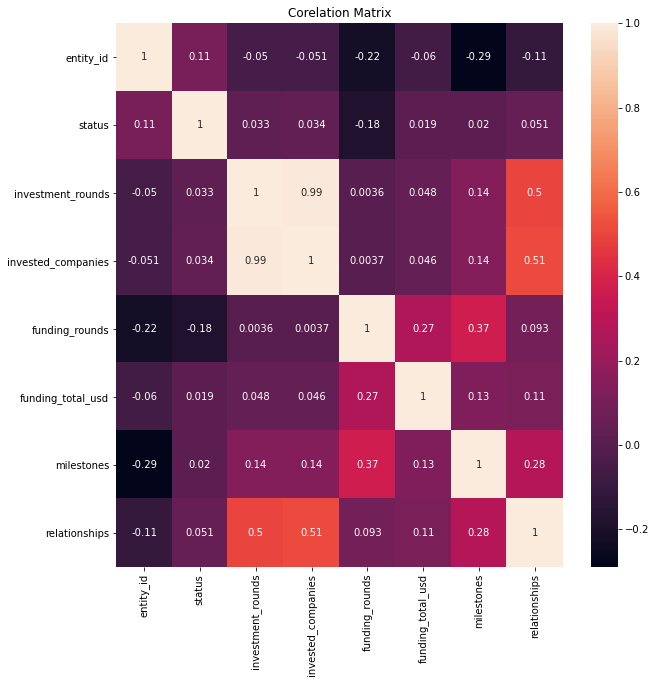

In [20]:
# Correlation matrix with columns that have int/float dtype
corrMatrix = df_c.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sn.heatmap(corrMatrix, annot=True, ax=ax)
ax.set_title("Corelation Matrix")
plt.show();

From this data, we can see that most factors do not have a strong correlation; Except between investment_rounds and invested_companies with a 0.99 correlation. This can be expected with how startups raise funds, as by progressing on to subsequent funding rounds, it is an indicator of investors confidence in the startups, and that the firm is progressing well and meeting achievement milestones. Thus, as investment rounds increases, it is highly likely that increasing number of stakeholders are involved with the startup.

With such high correlation, we decided to drop invested_companies, to avoid duplication of similar analysis made in the subsequent ML model. 

In [21]:
df_c = df_c.drop("invested_companies", 1)

### 3.2 Category Analysis

#### 3.2.1 Total Company Category Breakdown

Breaking down number of startups by industry is an interesting insight on the which industries are the most popular for startups ventures. 

In [22]:
# Data Transformation

count = df_c["category_code"].value_counts()
count_d= count.to_dict()
count_d = {k: v for k, v in sorted(count_d.items(), key=lambda item: item[1])}
category = list(count_d.keys()) # y values
number = list(count_d.values())

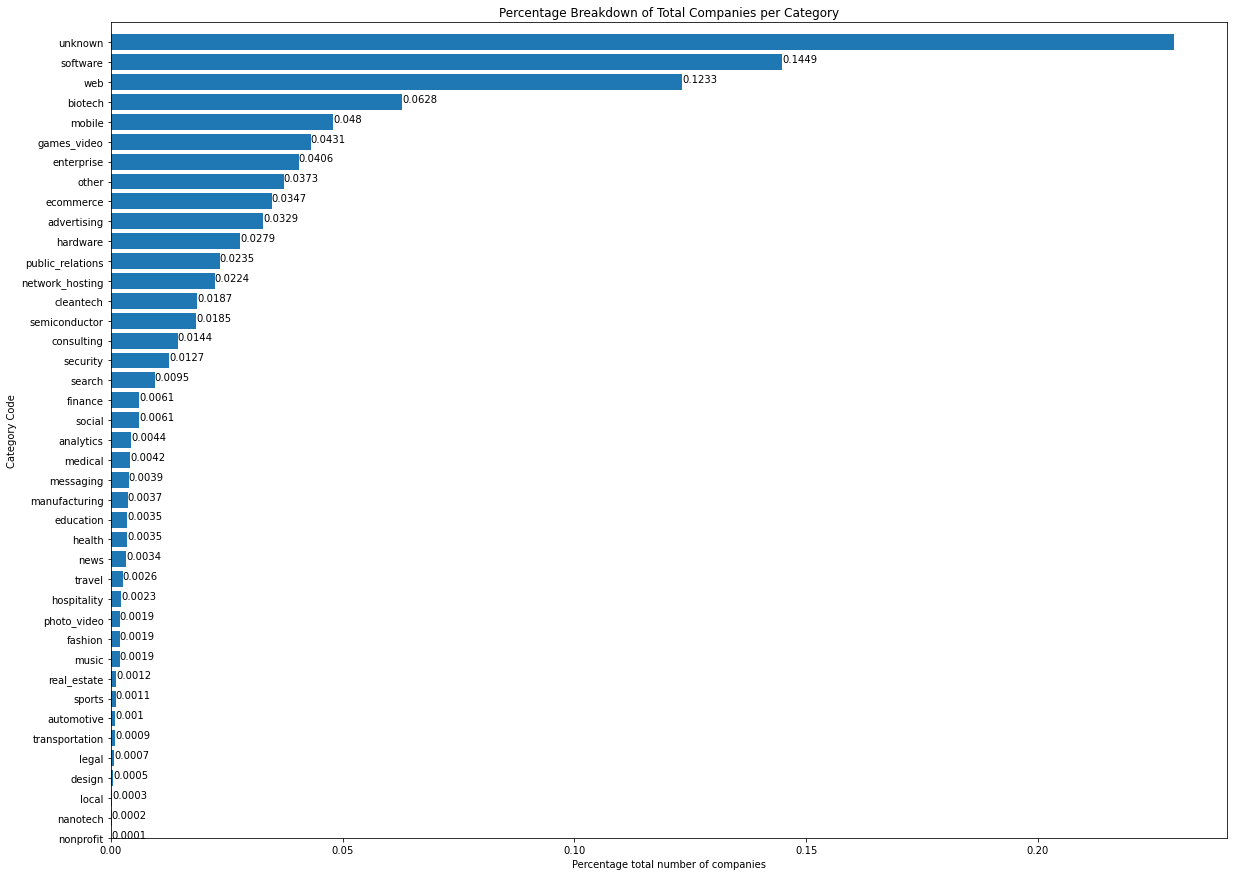

In [23]:
# Creating horizontal barchart

total = sum(number)
number_per = [] # x values
for x in number:
    number_per.append(x/total)
    
# plotting horizontal bar chart
bin = len(category)
plt.figure(figsize=(20, 15))
plt.barh(range(len(number_per)), number_per, tick_label=category, align='center')
plt.ylim([0,bin])

# putting numerical value of each category
for index, value in enumerate(number_per):
    textvar = plt.text(value, index,str(round(value,4)))
    
textvar.remove()
# inserting necessary labels for better visualization
y = plt.ylabel("Category Code")
x = plt.xlabel("Percentage total number of companies")
t = plt.title("Percentage Breakdown of Total Companies per Category")

plt.show();

Based on the data, software is the most popular known category with the highest concentration of startups. This could be because of the high profitability of software companies, and the ease of scalability of softwares as compared to physical products. For instance, a software can be sold and implemented across industries and companies if viable, and is more flexible to adapt and tailor to the different needs of potential future clients. 

### 3.2.2 Total Funding for each Category

This bar chart is a break down of total funds raised within each industry. This could be an interesting insight, with how funding could affect the likelihood of success if a startup is in a better funded industry. 

In [24]:
# Transforming data, need to sum total funding per category type
fund_per_cat = {} #create a dictionary that will hold how much funding each category makes
for index, row in df_c.iterrows():
    if row["category_code"] not in fund_per_cat:
        fund_per_cat[row["category_code"]] = 0
    else:
        fund_per_cat[row["category_code"]] += row["funding_total_usd"]
fund_per_cat = {k: v for k, v in sorted(fund_per_cat.items(), key=lambda item: item[1])} #Sort category based on highest total funding

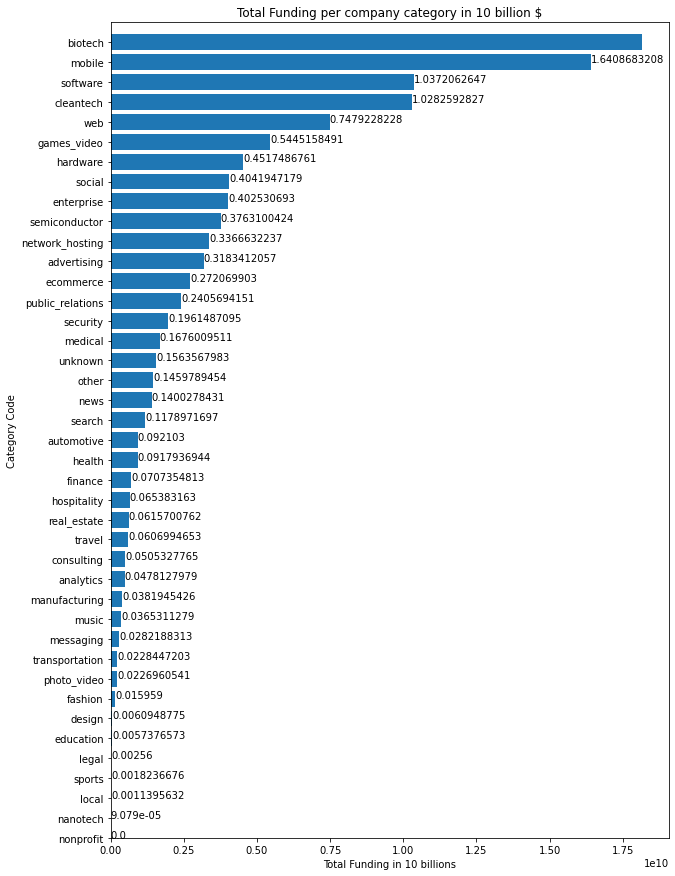

In [25]:
# creating horizontal bar chart
category = list(fund_per_cat.keys()) # horizontal x values
total_funds = list(fund_per_cat.values()) # horizontal y values

# plotting horizontal bar chart
bin = len(total_funds)
plt.figure(figsize=(10, 15))
plt.barh(range(len(fund_per_cat)), total_funds, tick_label=category, align='center')
plt.ylim([0,bin])

# putting numerical value of each category
for index, value in enumerate(total_funds):
    textvar = plt.text(value, index,str(value/10000000000))

textvar.remove()
# inserting necessary labels for better visualization
y = plt.ylabel("Category Code")
x = plt.xlabel("Total Funding in 10 billions")
t = plt.title("Total Funding per company category in 10 billion $")

plt.show();

Biotech is the most well funded industry. This could be due to the wide range of products and sectors that biotech emcompasses from drug testing to robotic surgery. WIthin biotech, each product is so specialised making the innovation processes expensive, hence it could be the reason for large funding amounts. Compared to industrues with the lowest fundings (sports, legal, eductaion), innovation takes place on a very small and minimal scale for such industries, hence less funding is required. 

Compared to the previous graph, we can see that most categories are within similar places, meaning that logically, the number of companies in a category affects how much funding the category has raised. However, even though, biotech companies are less, they have raised more funding, which could imply that investors are more interested in them. Additionally, the unknown category, although containing a lot of companies, it has not raised a lot of funding, which could explain why the creators do not want to disclose the industry of operation.

#### 3.2.3 Milestone Range for each Category

Milestones is one indicator of how companies are progressing with the development of their product. An example of a milestone would be deployment to select user groups for beta testing. 

/opt/anaconda/envs/Python3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


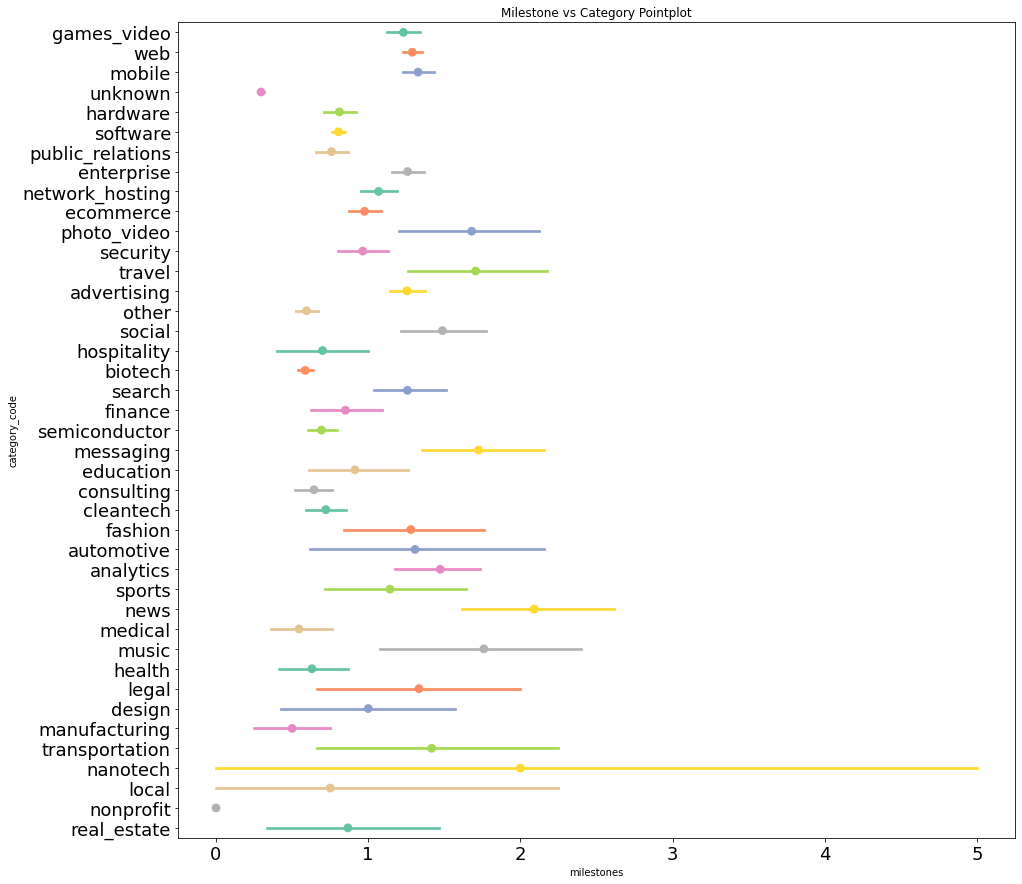

In [26]:
plt.figure(figsize=(15,15))
sn.pointplot("milestones","category_code",data=df_c, palette="Set2").set_title('Milestone vs Category Pointplot')
plt.tick_params(axis="both",labelsize=18)
plt.show();

We are able to observe the average, minimum, and maximum number of milestones each industry goes through during when they were operating. Nanotech has the highest varience in milestones, as they might require more stringent testing, taking more time to deploy to users. 

The mean amount of attributes most industries are reaching ranges from 1 to 2. We wonder if successful companies achieve more milestones on average.

/opt/anaconda/envs/Python3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


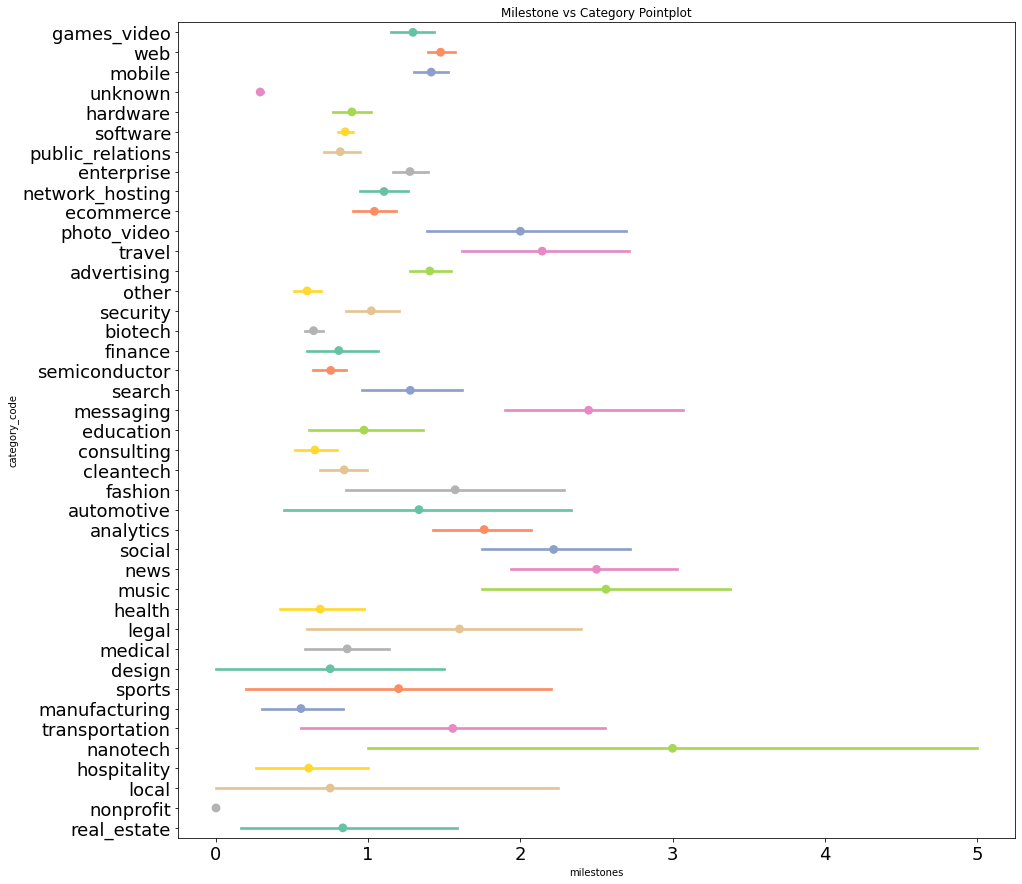

In [27]:
df_successful = df_c[df_c.status == 1]

plt.figure(figsize=(15,15))
sn.pointplot("milestones","category_code",data=df_successful, palette="Set2").set_title('Milestone vs Category Pointplot')
plt.tick_params(axis="both",labelsize=18)
plt.show();

We can see that the distribution has changed and that successful companies across different categories achieve more milestones, however, have a bigger variation of milestones. This shows that industries are not very consistent with the amount of milestones which could be due to the speed of success of the company - generally successful companies would need to put a lot of effort (more milestones), however, sometimes a few they could succeed early on (less milestones). 

## 3.3 Total Funding Rounds vs Total Funding for successful and non-successful startups

This is a key analysis and visualisataion for the project, since the primary comparison is between successful vs non-successful startups. 

In [28]:
# Data Transformation for total funding rounds (barchart 1)

df1 = df_c[["status","funding_rounds"]]
funding_rounds_sum = df1.groupby("status").sum()
funding_rounds_sum = funding_rounds_sum.to_dict()

# X & Y values for barchart 1
x1_y1 = {}
for value in funding_rounds_sum.values():
    x1_y1.update(value)
x1_y1 = {k: v for k, v in sorted(x1_y1.items(), key=lambda item: item[1], reverse=True)} # sort keys by highest values
x1_y1 = {("Successful" if k==1 else "Non-Successful"):v for k,v in x1_y1.items()} # change keys

# Data Transformation for total fundin (barchart 2)
df2 = df_c[["status","funding_total_usd"]]
funding_total_sum = df2.groupby("status").sum()
funding_total_sum = funding_total_sum.to_dict()

# X & Y values for barchart 2
x2_y2 = {}
for value in funding_total_sum.values():
    x2_y2.update(value)
x2_y2 = {k: v for k, v in sorted(x2_y2.items(), key=lambda item: item[1], reverse=True)} #sort keys by highest value
x2_y2 = {("Successful" if k==1 else "Non-Successful"):v for k,v in x2_y2.items()} # change keys

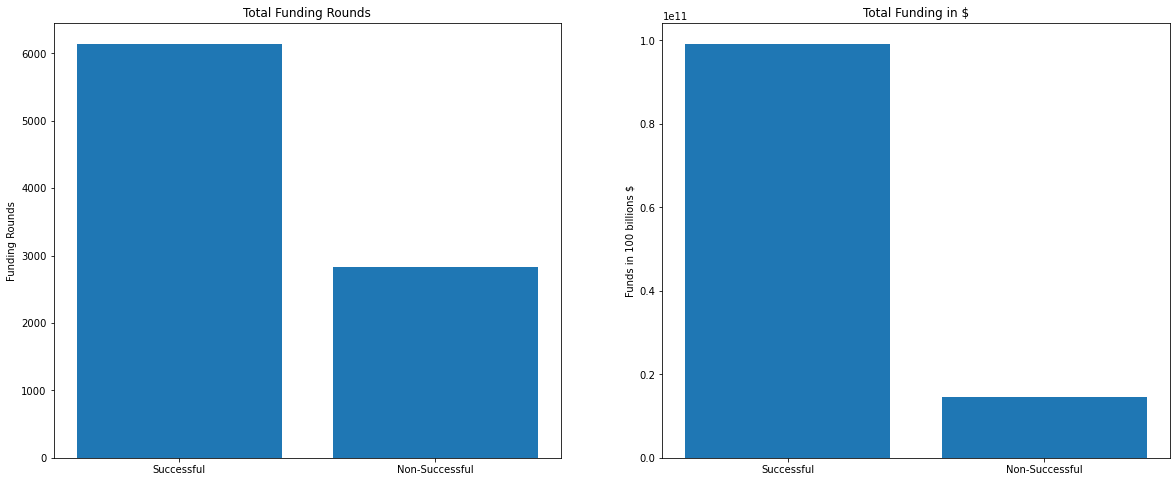

In [29]:
x1 = list(x1_y1.keys())
y1 = list(x1_y1.values())
x2 = list(x2_y2.keys())
y2 = list(x2_y2.values())

f, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
ax1.bar(x1,y1)
t1 = ax1.set_title('Total Funding Rounds')
y1 = ax1.set_ylabel("Funding Rounds")

ax2.bar(x2, y2)
t2 = ax2.set_title('Total Funding in $')
y2 = ax2.set_ylabel("Funds in 100 billions $");

Total funding rounds and total funding in $ has a similar distribtion across both successful and non-successful. Whereby successful startups generally have more funding rounds and raise more money. This is not a surprsing observation, but a unique takeaway from this data is that non-successful startups have significantly higher funding rounds as compared to the funds raised, when comparing both charts side-by-side. This could be an idicator that althought non-successful startups can have multiple funding rounds (which might make people believe they are progressing well and on track to becoming successful), they still have limited funds raised. This could be due to lack of confidence from investors where they place limited funding.

Additionally, if the company keeps on raising funds the equity the company is able to offer is less than within the first funding rounds. Therefore, less investors would interested to invest more money for a smaller share of the company. 

## 3.4 Successful vs Non-Succesful Companies per Country

This visualisation could give interesting insight to where most innovations and certain country 'hotspots' for startups are. 

In [30]:
# data transformation for horizontal bar chart
df3 = df_c[["status","country_code"]]

successful = {} # dict that stores amount of successful company for each country
failure = {} # dict that stores amount of failure company for each country

for index, row in df3.iterrows(): # fill successful dict
    if row["country_code"] not in successful and row["country_code"] != "unknown":
        successful[row["country_code"]] = 0
    if row["status"] == 1 and row["country_code"] != "unknown":
        successful[row["country_code"]] +=1  
        
for index, row in df3.iterrows(): # fill failure dict
    if row["country_code"] not in failure and row["country_code"] != "unknown":
        failure[row["country_code"]] = 0
    if row["status"] == 0 and row["country_code"] != "unknown":
        failure[row["country_code"]] +=1

labels = list(successful.keys()) # list of country names
successful_v = list(successful.values()) # list of successful companies for each country
failure_v = list(failure.values()) # list of failure companies for each country

total_companies = {} # total companies for each country

for x in range(len(labels)):
    total_companies[labels[x]] = successful_v[x] + failure_v[x]
    
total_companies = {k: v for k, v in sorted(total_companies.items(), key=lambda item: item[1], reverse=False)} #country with total company sorted

labels_30 = list(total_companies.keys())[-1:-31:-1] #take key of top 30 countries with highest company
successful_30=[] # total successful company for each country
failure_30=[] # total failure company for each country

for x in labels_30: #fill 
    successful_30.append(successful_v[labels.index(x)])
    failure_30.append(failure_v[labels.index(x)])

successful_30 = np.array(successful_30) # turned to array for left argument for ax.barh
failure_30 = np.array(failure_30) # turned to array for left argument for ax.barh


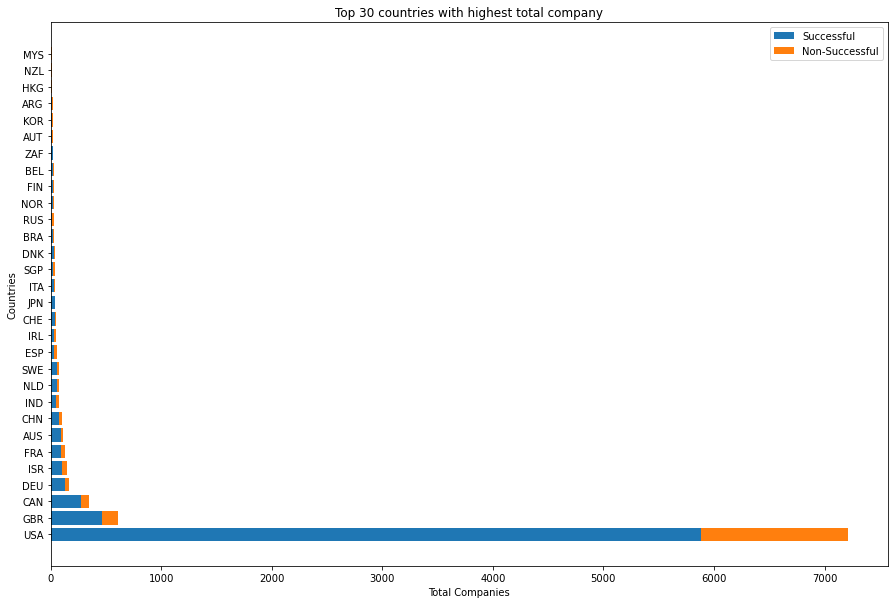

In [31]:
# plotting horizontal bar-chart
fig, ax = plt.subplots(1, figsize=(15, 10))

ax.barh(labels_30, successful_30,label='Successful')
ax.barh(labels_30, failure_30, left = successful_30,label="Failure")

plt.ylabel("Countries")
plt.xlabel("Total Companies")
plt.legend(["Successful", "Non-Successful"])
plt.title("Top 30 countries with highest total company")
plt.show();

USA is the most popular country location for companies to setup headquarters. This could be because of the reputation built around innovation within the US, with Silicon Valley often paving the way for new innovations as well. Majority of startups seem to setup ground in the US. We wonder if the ranks of percentages of successful startups per country would be the same. 

In [32]:
# Data Transformation
total_30 = successful_30 + failure_30 #total companies per country 
successful_30p = successful_30/total_30 # successful percentage per country
failure_30p = [] # failure percentage per country

country_30p = {k:v for k,v in zip(labels_30,successful_30p)} # create a dict where country is associated with its successful rate
country_30p = {k: v for k, v in sorted(country_30p.items(), key=lambda item: item[1], reverse=True)} # sort dict from lowest to highest
labels_30p = list(country_30p.keys()) # country
successful_30p = np.array(list(country_30p.values())) # successful percentage for that country
failure_30p = 1-successful_30p # failure percentage for that country

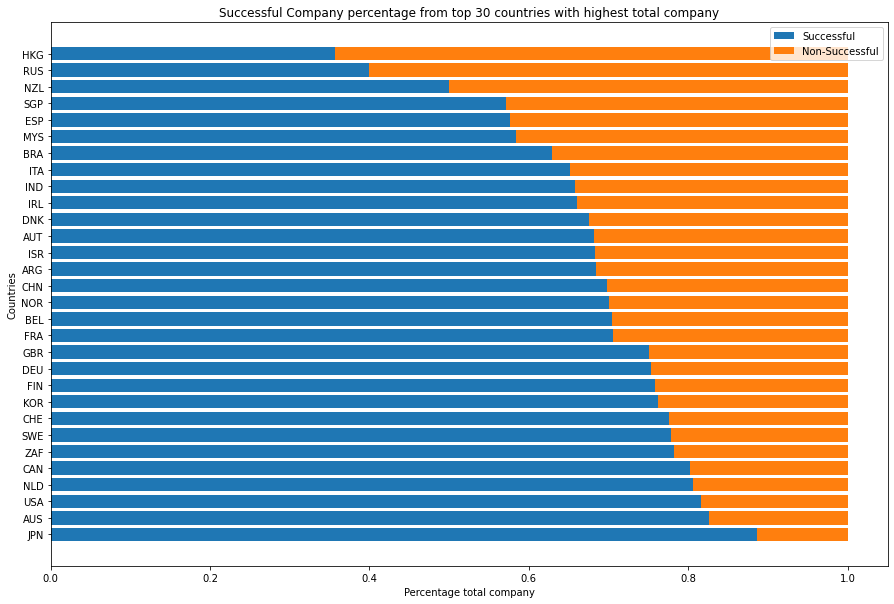

In [33]:
# plotting horizontal bar-chart
fig, ax = plt.subplots(1, figsize=(15, 10))

ax.barh(labels_30p, successful_30p,label='Successful')
ax.barh(labels_30p, failure_30p, left = successful_30p,label="Failure")

plt.ylabel("Countries")
plt.xlabel("Percentage total company")
plt.legend(["Successful", "Non-Successful"])
plt.title("Successful Company percentage from top 30 countries with highest total company")
plt.show();

Although USA has the highest total of startup company, Australia and Japan have higher success rate than USA. We could see that other countries have moved their ranks as well which would suggest that the number of startups in a country does not increase the probability of success in that country.

## 4. Data prepatation for Analysis

In [34]:
#displaying data again and identifying columns that would need to be dropped or populated with dummy values
df_c

,entity_id,name,category_code,status,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships
1,10,Flektor,games_video,1,USA,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,0,6
2,100,There,games_video,1,USA,NaN,NaN,0,NaN,NaN,0,0,01/02/2003,23/09/2011,4,12
13,1001,FriendFeed,web,1,USA,NaN,NaN,0,26/02/2008,26/02/2008,1,5000000,01/05/2008,13/09/2012,3,14
16,10012,moviestring.com,games_video,0,unknown,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,0,1
18,10014,Mobclix,mobile,1,USA,NaN,NaN,0,01/09/2008,01/09/2008,1,0,01/03/1995,18/09/2012,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196519,997,Zimbra,enterprise,1,USA,NaN,NaN,0,01/04/2006,01/04/2006,1,14500000,01/11/2006,22/11/2010,3,19
196524,99737,HyperCube,public_relations,1,USA,NaN,NaN,0,NaN,NaN,0,0,06/11/2005,06/11/2005,1,4
196526,9977,Carticipate,mobile,0,USA,NaN,NaN,0,18/05/2008,18/05/2008,1,130000,03/08/2008,01/09/2009,2,3
196540,9989,Shattered Reality Interactive,games_video,0,USA,NaN,NaN,0,12/03/2008,01/02/2009,2,1100000,01/11/2005,10/09/2008,2,4


In [35]:
# Since we want to further investigate the impact of the category related to other factors, we will create a dummy variable for it to be able to preserve it
category_c = pd.get_dummies(df_c['category_code'])

#Adding it to the final dataset for the ML testing called "data"
data = pd.concat([df_c,category_c],axis=1)

In [36]:
#declaring y as data with only the status column as that is our target column
y = data.status

#declaring X as data without all the non-numerical columns/columns with NaN values and target variable 
#on it so we can use algorithms. The presence of categorical data in a string format gives us an error
X = data.drop(['entity_id', 'status', 'name', 'category_code', 'country_code', 'first_investment_at',
              'first_funding_at', 'last_investment_at', 'last_funding_at', 'first_milestone_at', 
              'last_milestone_at'], 1)

#displaying the refined dataset that we will use for the model
X.head()

,investment_rounds,funding_rounds,funding_total_usd,milestones,relationships,advertising,analytics,automotive,biotech,cleantech,consulting,design,ecommerce,education,enterprise,fashion,finance,games_video,hardware,health,hospitality,legal,local,manufacturing,medical,messaging,mobile,music,nanotech,network_hosting,news,nonprofit,other,photo_video,public_relations,real_estate,search,security,semiconductor,social,software,sports,transportation,travel,unknown,web
1,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,4,12,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,0,1,5000000,3,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
16,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18,0,1,0,4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 5. Logistic Regression

In [37]:
#creating training dataset from 80% of the dataset and testing datasets using the other 20% of the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

In [38]:
#finds probability of the business status being classified as successful based on whether the probability is above or
#below the threshold value (50%) and assigns a status value
model_LR=sm.Logit(y,X)

#fitting the model onto the training data
result = model_LR.fit()

#displaying results of Logistic regression
print(result.summary())

         Current function value: 0.393996
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 status   No. Observations:                13039
Model:                          Logit   Df Residuals:                    12993
Method:                           MLE   Df Model:                           45
Date:                Tue, 21 Dec 2021   Pseudo R-squ.:                  0.1978
Time:                        07:43:07   Log-Likelihood:                -5137.3
converged:                      False   LL-Null:                       -6404.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
investment_rounds     0.5838      0.272      2.144      0.032       0.050       1.117
funding_rounds       -0.6892      0.030    -

/opt/anaconda/envs/Python3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [39]:
# When looking at the table we can see that some values are not significant P>|z| is bigger than 0.05. 
# We will therefore remove such variables in order to get more accurate model:

X = X.drop(['automotive', 'design', 'fashion', 'legal','local', 'medical',
            'messaging','music','nanotech', 'nonprofit','photo_video','real_estate',
           'search','sports','transportation','travel',
           'unknown', # highest coefficient out of all variables which does not make sense and does not show any insight
           'news', 'web', 'hospitality','security','manufacturing' #this row was been because in the second iteration they showed to be insignificant. 
           ], 1)

#rerunning model with updated dataset
logit_model=sm.Logit(y,X)
result = logit_model.fit()
print(result.summary())

#preparing for LogisticRegression()
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Optimization terminated successfully.
         Current function value: 0.511644
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                 status   No. Observations:                13039
Model:                          Logit   Df Residuals:                    13015
Method:                           MLE   Df Model:                           23
Date:                Tue, 21 Dec 2021   Pseudo R-squ.:                -0.04174
Time:                        07:43:07   Log-Likelihood:                -6671.3
converged:                       True   LL-Null:                       -6404.0
Covariance Type:            nonrobust   LLR p-value:                     1.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
investment_rounds     0.8794      0.283      3.106      0.002       0.325       1.434
funding

LogisticRegression()

From the Logistic Regression we can see that the number of funding rounds is negatively correlated with the possibility of success for a start up. This is consistent with previous assumptions that were showed through the data. 

Consistency is also kept with the categories that impact the model - categories like "biotech" and "software" have a higher impact on the success which could also be due to the fact that they receive a lot of funding in general.

However, the model has a R squared value close to 0 which shows that it does not fit the data well. We will try to understand if the model should be disregarded as the R quared suggests. 

In [40]:
#creating predictions using X_test and assigning to y_predictions
y_predictions_LR = logreg.predict(X_test)

#accuracy shows what percentage of business status the model predicted correctly
print('Logistic Regression Accuracy is: {:.2f}'.format(accuracy_score(y_test, y_predictions_LR)))
#precision shows the percentage of model's company that predicted to do well that actually did well
print('Logistic Regression Precision score is: {:.2f}'.format(precision_score(y_test, y_predictions_LR)))

Logistic Regression Accuracy is: 0.81
Logistic Regression Precision score is: 0.81


In [41]:
# The output of the model is just 1 - meaning all inputs would come out as successful.
np.unique(y_predictions_LR)

array([1])

Although the accuraccy and precision scores is quite high and averages to 0.8, the outcome of the prediction is only successful companies- 1. As it just predicts that all companies coming into the model will be successful, it would be highly inaccurate in the real world. __If all companies coming into the model are shown as successful, a VC that uses this algorithm would go bankrupt as the model will encourage investment in unsuccessful companies as well.__ Therefore, we will look for another algorithm to fit our purpose.

## 6. XGBoost

As one of the most widely used algorithms for classification problems, we have decided to try the XGBoost algorithm to our data. We are using a simplified version and tune the hyperparameters to improve performance.

In [42]:
# Preparing data again for the new model - repating previous steps
category_c = pd.get_dummies(df_c['category_code'])
data = pd.concat([df_c,category_c],axis=1)

y = data.status
X = data.drop(['entity_id', 'status', 'name', 'category_code', 'country_code', 'first_investment_at',
              'first_funding_at', 'last_investment_at', 'last_funding_at', 'first_milestone_at', 
              'last_milestone_at','automotive', 'design', 'fashion', 'legal','local', 'medical',
            'messaging','music','nanotech', 'nonprofit','photo_video','real_estate',
           'search','sports','transportation','travel','unknown',
           'news', 'web', 'hospitality','security','manufacturing'], 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

In [43]:
# initiating parameters and creating the XGBoost model
model = XGBClassifier(use_label_encoder=False, 
                      objective = 'binary:logistic', #for binary classification problem
                      eval_metric='auc', # for binary classification
                      max_depth = '4', #reducing to avoid overfitting
                      subsample= 0.8, #randomly sampling 80% of the training data to avoid overfitting
                      seed='30', # increasing to ensure model is repeatable
                      min_child_weight = '8' #increasing to be more conservative with the algorithm
                     )

#fitting the model to the training data
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth='4', min_child_weight='8',
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=8, num_parallel_tree=1, predictor='auto', random_state=30,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed='30',
              subsample=0.8, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

In [44]:
#creating predictions using X_test and assigning to y_predictions
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [45]:
# evaluating predictions
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (accuracy * 100.0))

#The model has higher accuracy and precision score than the logistic regression 

Accuracy: 85.43%
Precision: 85.43%


In [46]:
#two unique predictions with improved accuracy and precision - this mode is better than model 1
np.unique(predictions)

array([0, 1])

The model displays promising results that should be investigated and developed further for commercialisation. Although an accuracy and precision score of 86.16% is good, in the VC fund context the rest 13.84% could mean millions of dollars in losses. The model should be developed further to impove on its accuracy and point VC towards successful companies, reaching millions in savings.  

## 7. Summary and Limitations

From the analysis section we can see that certain industries, especially the technology-led industries are populated with more startups and more startups receive funding as compared to start ups in less technologically advanced sectors before 2013. We also saw that the majority of successful companies were completing more milestones than their counterparts although their variability was higher. Adittionally, we understood that the country with most startups is the US and in other economicly strong countries.

From the ML models we confirmed our analysis that technological companies effect the probability of success as well as the assumption made from the analysis that funding rounds are negatively correlated to success. Although the Logistic Regression algorithm was not a good solution to the problem, the XGBoost algorithm shows promising results that need to be explored further and create a commercializatble tool for VC funds to assess incoming stratup's success. 

### Limitations

We removed the majority of our data - ‘operating’ startups in the cleaning stage which leads to the possibility of our data being skewed as we are excluding potentially successful startups. Operating might not necessarily mean that they are not successful, but might mean that founders have a different vision for the path of their business and might still want operating control over the business. We could have ommitted this limitation by exploring the dataset further given more time.

The founding and closing dates have been removed due to missing values. These columns and other date columns could have provided insight about the years of operating the start up and we could have achieved it through reducing the dataframe further to less than 10 thousand values. The limitation could be ommited by gathering more data and time to explore.

We decided to not explore the rest of the date attributes (like first and last funding rounds) as some company might get a funding round in a short period of time compared to the inital funding round due to it being easier to get rounds if someone has already invested. This is a limitation to our project because we could ave gained additional insight about a company's performance. This limitation could be ommited by feature engineering the date variables and performing futher analysis in the future.

## 8. Appendix

In [47]:
#Displaying wordcount in markdown cells

from wordcount import nb_word_count
nb_word_count("MSIN0143_2021_GROUP_M2.ipynb")

#The wordcount function is run before adding in the section in the appendix about Trello and the references, 
#as they are excluded from the wordcount. If the number of words is different when rerun, 
#please remove the markdown sections after this cell.

/opt/anaconda/envs/Python3/lib/python3.8/site-packages/nbformat/current.py:15: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  warnings.warn("""nbformat.current is deprecated.


1998

### Trello for project management 

Throughout this group coursework, we have utilized Trello as our project management tool on a regular basis and in an agile manner and have benefited greatly from its ability to provide our team with a clear perspective of the status, progress, and documentation of our project. We summarized and itemized new and outstanding tasks and meetings each week, assigning them to each group member and recording attendance. We had weekly sprints with completed tasks which we then allocated to the respective week of completion (for readability) as it can be seen on the screenshots provided below. As a result, Trello has proven to be a beneficial project management tool for us.

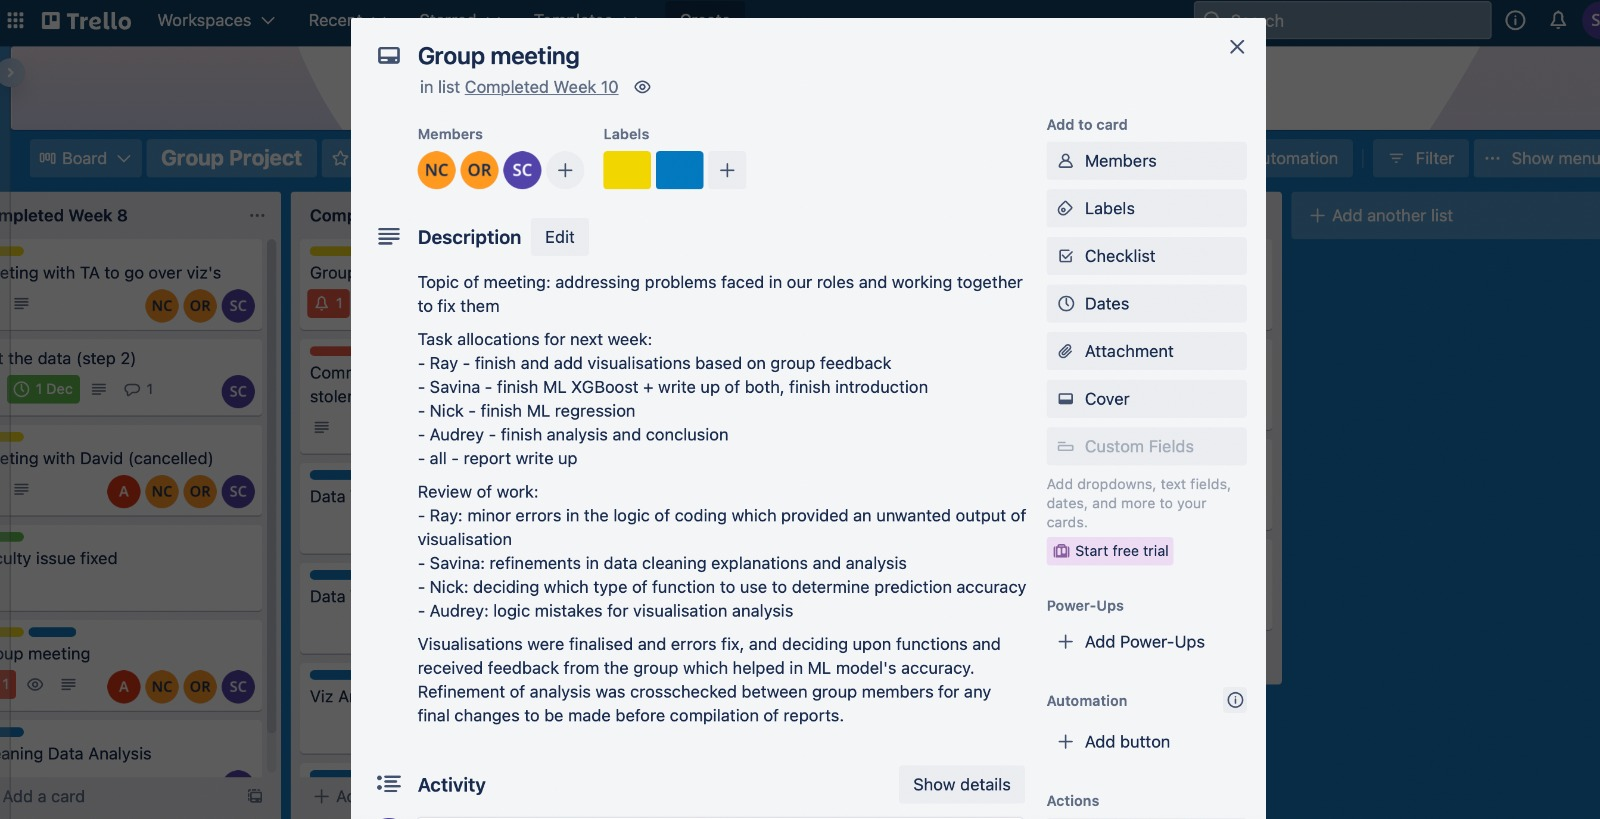

In [48]:
display.Image("Trello_Group_Meeting.jpeg")

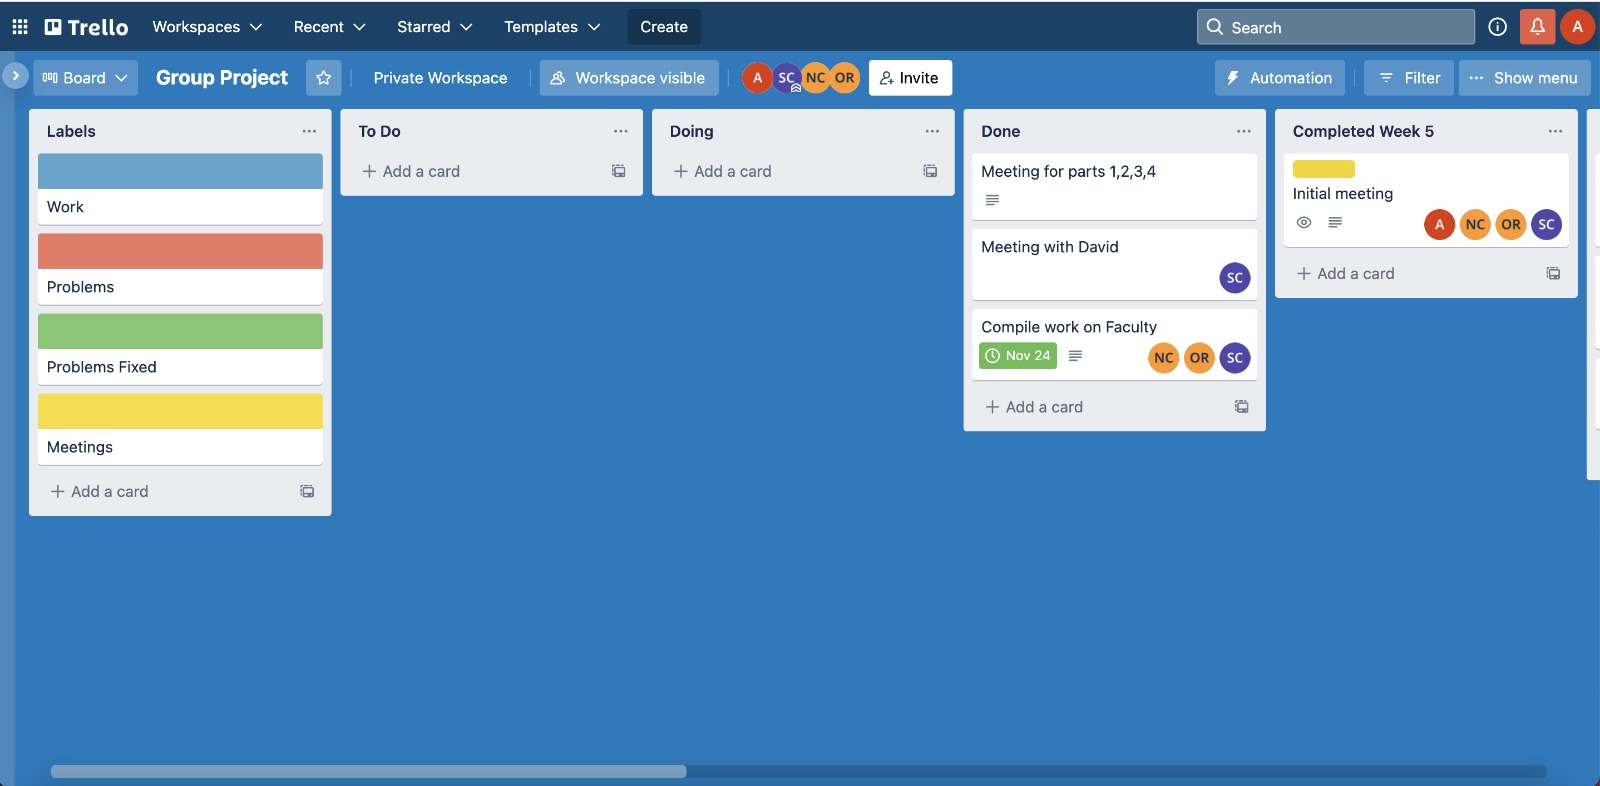

In [49]:
display.Image("Trello_Board2.jpeg")

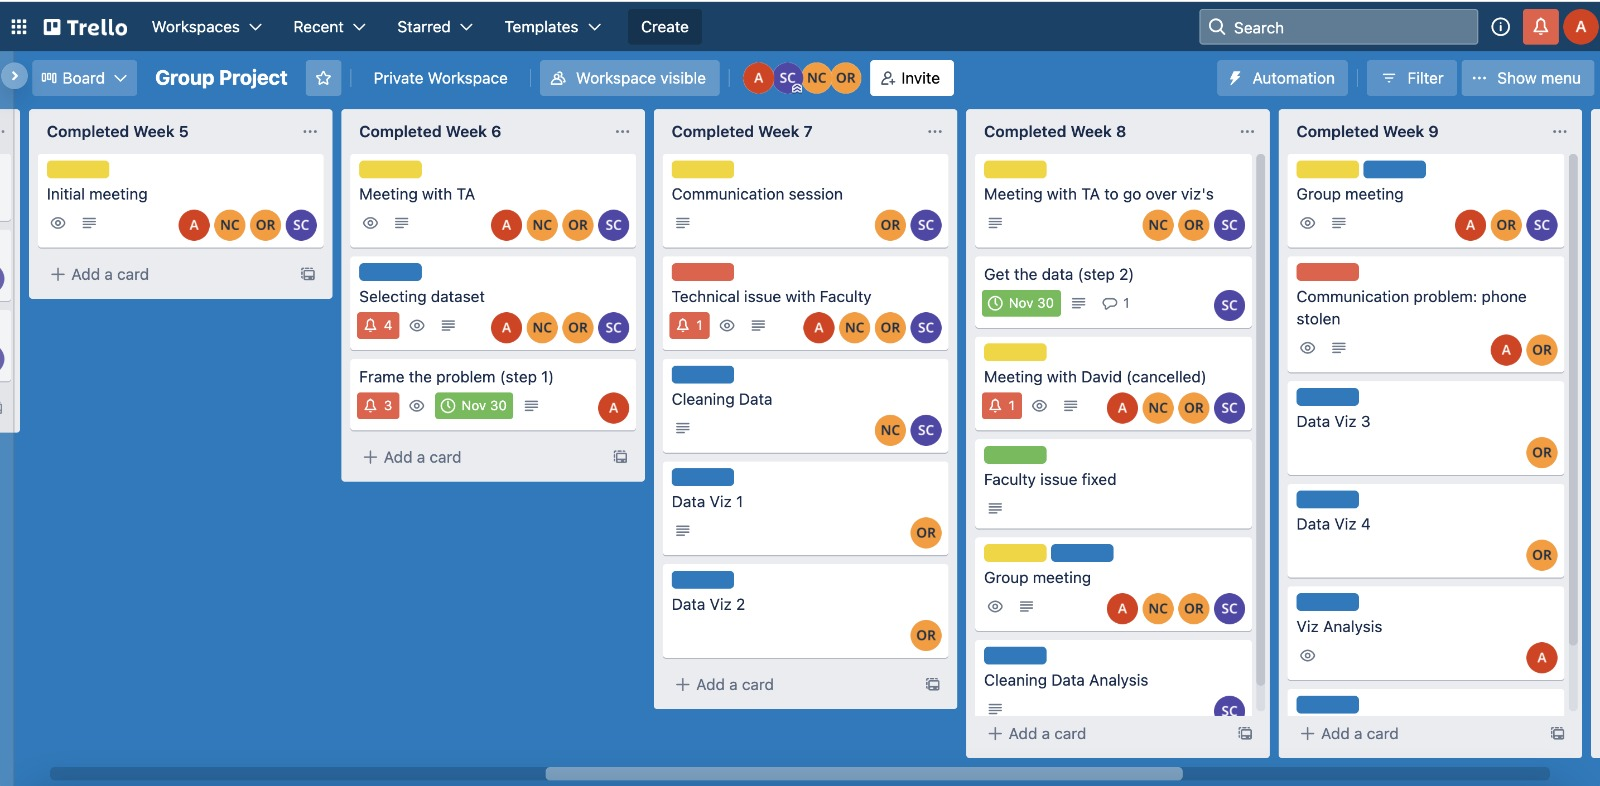

In [50]:
display.Image("Trello_Board3.jpeg")

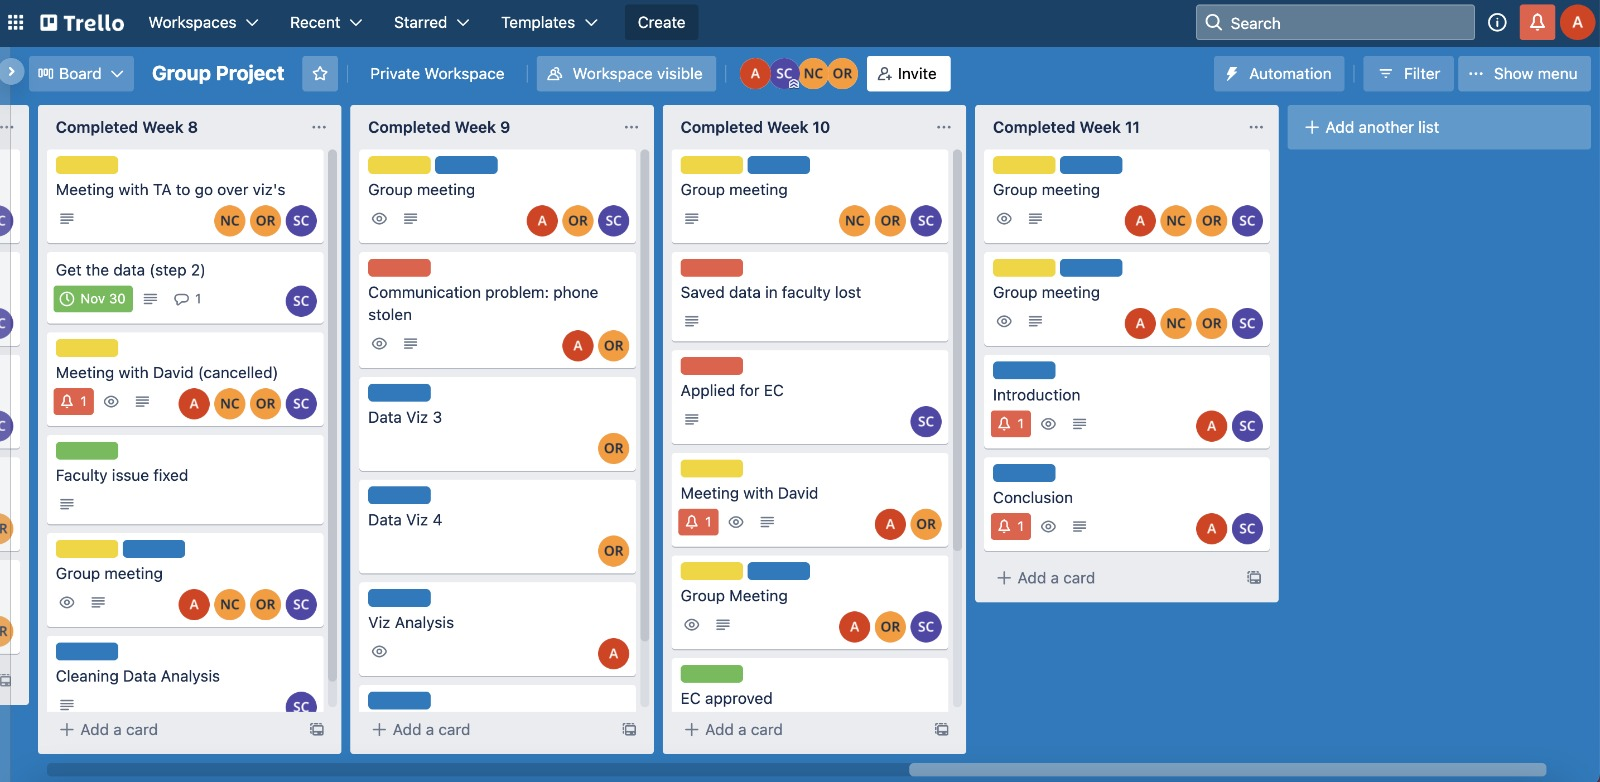

In [51]:
display.Image("Trello_Board1.jpeg")

## 9. References

Gompers, P.A. & Lerner, J., 2003. The Really Long-Run Performance of Initial Public Offerings: The Pre-Nasdaq Evidence. The Journal of finance (New York), 58(4), pp.1355–1392.


Gompers, P.A., 1996. Grandstanding in the venture capital industry. Journal of financial economics, 42(1), pp.133–156.